                 Neighborhood  Incidents  Safety Score
0                   Ridgemont          1     99.521531
1             Mt. Oliver Boro          2     99.043062
2                   St. Clair          2     99.043062
3                     Oakwood          3     98.564593
4               East Carnegie          3     98.564593
..                        ...        ...           ...
88             Homewood South         79     62.200957
89               East Liberty         80     61.722488
90                    Carrick        121     42.105263
91           South Side Flats        122     41.626794
92  Central Business District        209      0.000000

[93 rows x 3 columns]


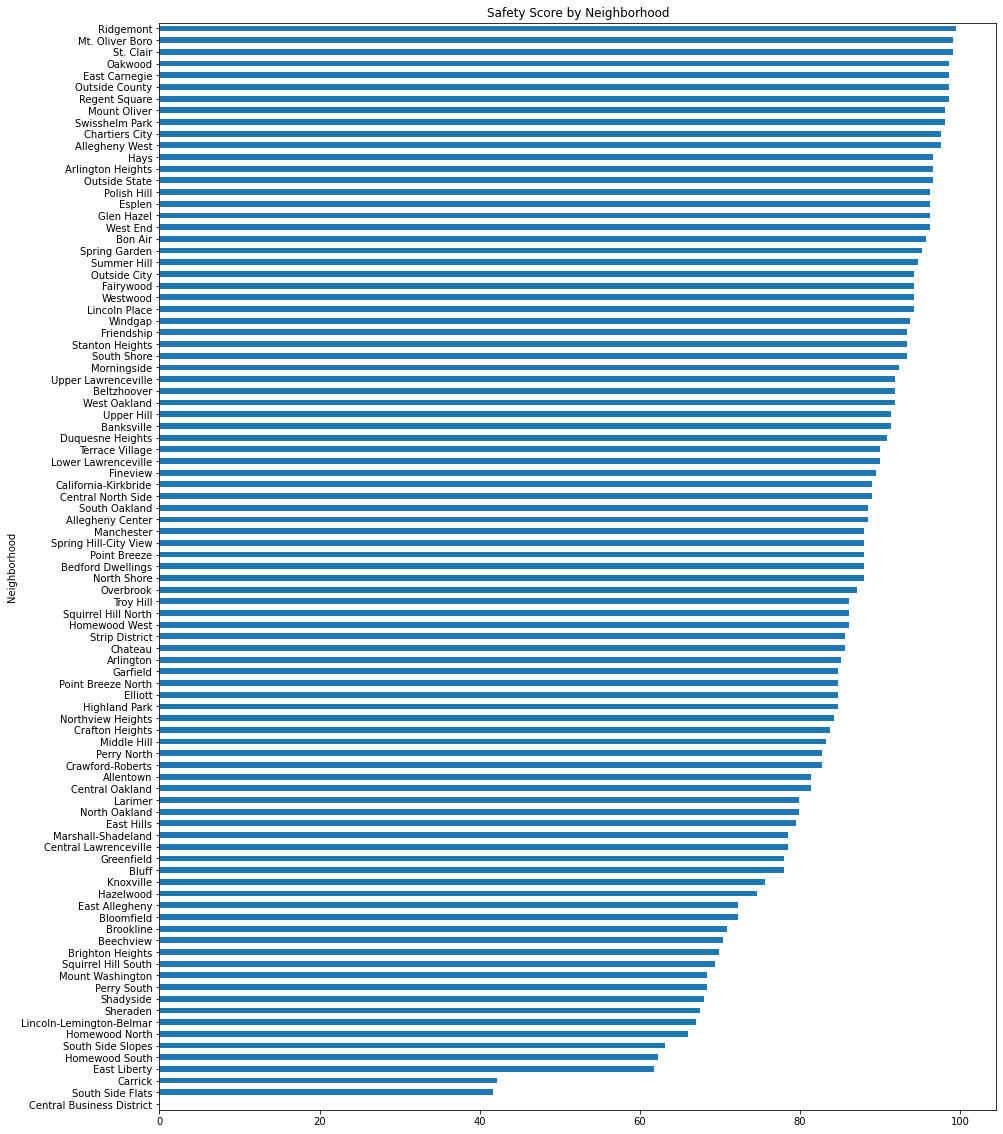

In [1]:
import pandas as pd
import numpy as np

# Parse CSV file
blotter_pandas = pd.read_csv("police-blotter.csv")

# Set default values for max and min incidents
min = 50
max = 50

# Create a new dictionary to populate with neighborhoods/incident counts
new_dict = {}

for i in range(len(blotter_pandas.index)):
# Check if neighborhood is not nan
    if pd.notna(blotter_pandas.iloc[i]["INCIDENTNEIGHBORHOOD"]):
# Check if neighborhood is already in dict, increment incidents if so, set to 1 if not
        if blotter_pandas.iloc[i]["INCIDENTNEIGHBORHOOD"] in new_dict:
            new_dict[blotter_pandas.iloc[i]["INCIDENTNEIGHBORHOOD"]] += 1
        else:
            new_dict[blotter_pandas.iloc[i]["INCIDENTNEIGHBORHOOD"]] = 1
            
# Check if new neighborhood incident count is fewer than min or greater than max and set values if so
        if new_dict[blotter_pandas.iloc[i]["INCIDENTNEIGHBORHOOD"]] < min:
            min = new_dict[blotter_pandas.iloc[i]["INCIDENTNEIGHBORHOOD"]]
        if new_dict[blotter_pandas.iloc[i]["INCIDENTNEIGHBORHOOD"]] > max:
            max = new_dict[blotter_pandas.iloc[i]["INCIDENTNEIGHBORHOOD"]]

# Create new lists for each of the three dataframe columns
colOne = []
colTwo = []
colThree = []

for i in new_dict:
# Iterate through the dictionary and populate each list with the appropriate data
    colOne.append(i)
    colTwo.append(new_dict[i])
# This line calculates Safety Score based on the given neighborhood's incident count and the maximum incident count
    colThree.append(100 - (100 * (new_dict[i] / max)))

# Generate data with column names and lists
data = {'Neighborhood': colOne,
        'Incidents': colTwo,
        'Safety Score': colThree
        }

# Create dataframe, sort rows by Safety Score descending, then reset the index
dataframe = pd.DataFrame(data)
dataframe = dataframe.sort_values(by=['Safety Score'], ascending=False)
dataframe = dataframe.reset_index(drop=True)

# Print the dataframe contents and plot the pertinent data
print(dataframe)
dataframe.loc[:, ['Neighborhood', 'Safety Score']].plot(kind='barh', figsize=(15,20), x='Neighborhood', title='Safety Score by Neighborhood', legend=False).invert_yaxis()

Based on the occurrence of police incidents in each neighborhood relative to every other neighborhood, Ridgemont is the winner with a Safety Score of approximately 99.52.